In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

cwd = os.getcwd()
#print(cwd)

In [2]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [3]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [4]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [5]:
ne_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
6,"Philadelphia, PA",PA,201567.0,195417.0,193750.0,197500.0,208000.0,219667.0,229667.0,233333.0,...,321133.0,316133.0,312467.0,308000.0,303000.0,305000.0,310667.0,322333.0,337333.0,350000.0
9,"Boston, MA",MA,315667.0,308333.0,305333.0,316000.0,330000.0,350667.0,361117.0,367783.0,...,606667.0,596667.0,586333.0,576667.0,560000.0,571417.0,593917.0,627417.0,652667.0,670167.0
26,"Pittsburgh, PA",PA,125000.0,124750.0,127083.0,131323.0,136823.0,141557.0,143483.0,143900.0,...,213000.0,206333.0,200000.0,191667.0,188333.0,191633.0,200633.0,210633.0,223667.0,232334.0
37,"Providence, RI",RI,195250.0,190750.0,188333.0,191667.0,200000.0,212800.0,219800.0,222300.0,...,399667.0,398500.0,391833.0,387167.0,381833.0,381833.0,388500.0,400500.0,417167.0,427167.0


In [74]:
ne_df_states = ne_df.drop(columns=['RegionName'])
ne_df_states = ne_df_states.groupby('StateName').mean()
#ne_df_states.to_csv("test.csv")
ne_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
CT,230396.400000,220900.000000,216250.000000,224216.600000,236333.20,252600.00,262916.800000,266850.000000,260426.60,248076.600000,...,352586.80,343746.600000,336880.00,329490.000000,323696.600000,326343.200000,336062.400000,355429.000000,379265.600000,395483.400000
MA,235460.000000,231909.800000,231479.800000,235210.000000,242590.00,248720.00,256006.800000,260223.200000,257896.80,253828.200000,...,447066.80,445493.400000,441316.20,426729.600000,420436.200000,421296.800000,434283.600000,448116.600000,467166.600000,476666.600000
ME,147183.500000,139160.250000,136760.500000,137498.000000,148654.00,155778.75,160003.750000,160003.500000,159014.50,162199.250000,...,300554.25,295141.750000,293287.50,290229.250000,295853.750000,304145.500000,316682.750000,323425.000000,333487.500000,338887.500000
NH,173633.400000,170590.000000,170976.600000,174196.600000,182389.80,188886.80,193573.400000,197010.000000,191980.00,186280.200000,...,367566.60,365000.000000,359833.20,352742.000000,347375.600000,350753.400000,355502.200000,376802.200000,393824.600000,409851.000000
NJ,225041.500000,215208.250000,214237.750000,213195.750000,224600.00,230446.00,233383.250000,231308.000000,227808.75,227780.250000,...,351162.50,341183.250000,340008.00,330720.750000,333825.000000,330458.250000,338916.750000,353312.500000,366020.750000,367054.250000
NY,132809.214286,130386.571429,129124.571429,132978.928571,135381.50,140120.00,143886.357143,145945.642857,145513.50,141858.142857,...,232251.00,228354.714286,223939.00,219153.357143,212487.928571,212613.928571,216338.928571,225595.285714,235153.928571,243230.642857
PA,130073.850000,128489.250000,126429.550000,126963.350000,131561.35,137978.20,141908.700000,141868.600000,138526.85,135628.550000,...,216099.70,213419.600000,210640.45,205762.050000,203406.500000,204034.050000,209558.250000,216144.150000,225376.650000,232599.750000
RI,195250.000000,190750.000000,188333.000000,191667.000000,200000.00,212800.00,219800.000000,222300.000000,216567.00,211233.000000,...,399667.00,398500.000000,391833.00,387167.000000,381833.000000,381833.000000,388500.000000,400500.000000,417167.000000,427167.000000


In [7]:
# Function to convert date columns to written form
def convert_to_month_name(col_name):
    month_num = int(col_name.split('/')[0])
    return calendar.month_name[month_num]

In [8]:
# Rename the columns to match the desired format
ne_df_states_typedmonths = ne_df_states.rename(columns=convert_to_month_name)
ne_df_states_typedmonths.head()

,January,February,March,April,May,June,July,August,September,October,...,October,November,December,January,February,March,April,May,June,July
StateName,,,,,,,,,,,,,,,,,,,,,
CT,230396.4,220900.00,216250.00,224216.60,236333.2,252600.00,262916.80,266850.0,260426.60,248076.60,...,352586.80,343746.60,336880.0,329490.00,323696.60,326343.20,336062.40,355429.0,379265.60,395483.40
MA,235460.0,231909.80,231479.80,235210.00,242590.0,248720.00,256006.80,260223.2,257896.80,253828.20,...,447066.80,445493.40,441316.2,426729.60,420436.20,421296.80,434283.60,448116.6,467166.60,476666.60
ME,147183.5,139160.25,136760.50,137498.00,148654.0,155778.75,160003.75,160003.5,159014.50,162199.25,...,300554.25,295141.75,293287.5,290229.25,295853.75,304145.50,316682.75,323425.0,333487.50,338887.50
NH,173633.4,170590.00,170976.60,174196.60,182389.8,188886.80,193573.40,197010.0,191980.00,186280.20,...,367566.60,365000.00,359833.2,352742.00,347375.60,350753.40,355502.20,376802.2,393824.60,409851.00
NJ,225041.5,215208.25,214237.75,213195.75,224600.0,230446.00,233383.25,231308.0,227808.75,227780.25,...,351162.50,341183.25,340008.0,330720.75,333825.00,330458.25,338916.75,353312.5,366020.75,367054.25


In [9]:
# Combining the columns by month
ne_df_combined_by_state = pd.DataFrame({
    "January": ne_df_states_typedmonths[["January"]].mean(axis=1),
    "February": ne_df_states_typedmonths[["February"]].mean(axis=1),
    "March": ne_df_states_typedmonths[["March"]].mean(axis=1),
    "April": ne_df_states_typedmonths[["April"]].mean(axis=1),
    "May": ne_df_states_typedmonths[["May"]].mean(axis=1),
    "June": ne_df_states_typedmonths[["June"]].mean(axis=1),
    "July": ne_df_states_typedmonths[["July"]].mean(axis=1),
    "August": ne_df_states_typedmonths[["August"]].mean(axis=1),
    "September": ne_df_states_typedmonths[["September"]].mean(axis=1),
    "October": ne_df_states_typedmonths[["October"]].mean(axis=1),
    "November": ne_df_states_typedmonths[["November"]].mean(axis=1),
    "December": ne_df_states_typedmonths[["December"]].mean(axis=1)  
})

ne_df_combined_by_state.head()

,January,February,March,April,May,June,July,August,September,October,November,December
StateName,,,,,,,,,,,,
CT,260049.709091,255922.236364,254212.563636,259337.781818,270732.945455,285553.727273,293999.454545,286983.960,281460.600,274454.000,267778.480,264633.14
MA,303336.836364,299333.400000,299899.072727,306207.327273,315865.109091,327276.000000,333622.236364,323054.820,320108.980,318065.640,315720.540,313529.44
ME,190926.113636,189052.045455,190611.954545,195286.909091,203069.340909,210612.568182,215517.136364,205909.550,204332.125,204399.000,200924.400,199130.45
NH,233476.563636,229942.309091,231437.581818,237785.218182,247898.309091,255987.163636,260131.800000,247200.820,246396.300,245729.800,244391.240,242593.44
NJ,255328.181818,252671.500000,251284.340909,251892.931818,260006.568182,265357.250000,268792.250000,259905.675,260731.025,262442.725,260339.825,259771.40


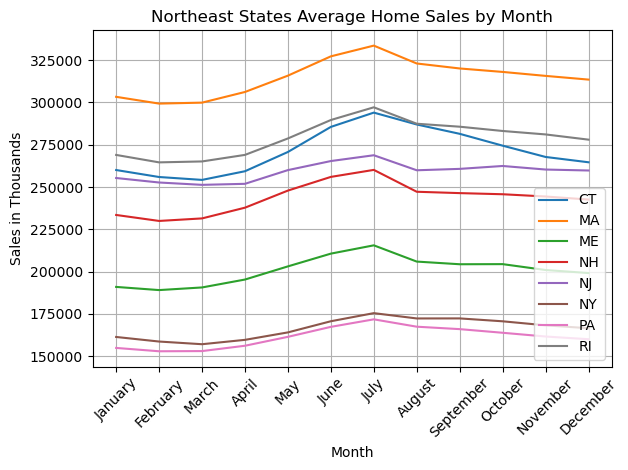

In [77]:
# Transpose rotates to graph data by states (instead of months)
df_transposed = ne_df_combined_by_state.transpose()

for state in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[state], label=state)

plt.title("Northeast States Average Home Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales in Thousands")
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/Months and Seasonality/Northeast/NE Avg by month.png")
plt.show()

In [25]:
df_seasons = df_transposed
df_seasons["Seasons"] = ["Winter","Winter", "Spring", "Spring", "Spring","Summer", "Summer","Summer", "Autumn","Autumn","Autumn","Winter"]
#df_seasons.reset_index()
df_seasons_grouped = df_seasons.groupby("Seasons").mean()
df_seasons_grouped = df_seasons_grouped.rename_axis('Seasons')
df_seasons_grouped 

StateName,CT,MA,ME,NH,NJ,NY,PA,RI
Seasons,,,,,,,,
Autumn,274564.360000,317965.053333,203218.508333,245505.780000,261171.191667,170370.766667,163788.658333,283303.433333
Spring,261427.763636,307323.836364,196322.734848,239040.369697,254394.613636,160231.673160,156840.928788,270950.969697
Summer,288845.713939,327984.352121,210679.751515,254439.927879,264685.058333,172774.310606,168820.583485,291400.809091
Winter,260201.695152,305399.892121,193036.203030,235337.437576,255923.693939,162146.911688,155903.209394,270523.706061


In [41]:
ne_df_seasons = pd.DataFrame({
    "Avg by Season": df_seasons_grouped.mean(axis=1)})
ne_df_seasons

,Avg by Season
Seasons,
Autumn,239985.968958
Spring,230816.611228
Summer,247453.813371
Winter,229809.093620


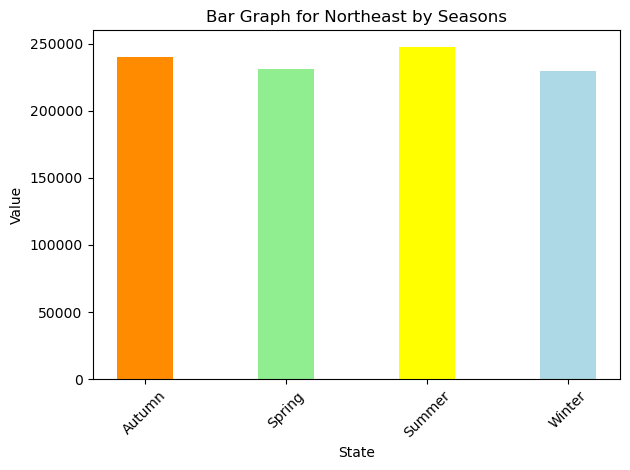

In [78]:
# Transpose the DataFrame for easier plotting
transpose_for_plotting = ne_df_seasons.transpose()


# Define color mapping for each season
color_map = {
    'Autumn': 'darkorange',
    'Spring': 'lightgreen',
    'Summer': 'yellow',
    'Winter': 'lightblue'
}

# Create four bar graphs by season
#plt.figure(figsize=(7, 3))
for season in transpose_for_plotting.columns:
    plt.bar(season, transpose_for_plotting[season], color=color_map[season], label=season, width=0.4)

plt.title("Bar Graph for Northeast by Seasons")
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.legend()
plt.savefig("Images/Months and Seasonality/Northeast/NE Avg by Seasons.png")
plt.show()
